In [55]:
import astroprov
from astropy.io import fits
from astropy.io.ascii import SExtractor
from astropy.stats import sigma_clipped_stats
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import os
from photutils import DAOStarFinder
from photutils import CircularAperture
from photutils import aperture_photometry
#import subproc

import numpy as np
from astropy import wcs
from astropy.io import fits
import sys
import astropy.table as T

from astroquery.simbad import Simbad

import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

import subprocess

In [11]:
assoc_reg = T.Table.read("/home/mj1e16/sextractor/sextractor-master/config/test.cat", format='ascii.sextractor')

In [12]:
assoc_reg

NUMBER,EXT_NUMBER,FLUX_ISO,FLUXERR_ISO,BACKGROUND,THRESHOLD,FLUX_MAX,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,FWHM_IMAGE,ELLIPTICITY
,,ct,ct,ct,ct,ct,pix,pix,pix,pix,pix,
int64,int64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
1,1,71.44205,7.876409,149.8424,5.907307,27.86269,302,21,301.577,21.4792,0.9,0.091
2,1,76.18069,7.876409,150.2415,5.907307,39.13943,475,21,474.568,21.3111,1.09,0.072
3,1,47.87448,6.82117,150.2303,5.907307,30.18431,615,22,614.6744,21.7177,2.52,0.374
4,1,153.6394,9.646591,151.259,5.907307,52.24979,924,21,923.429,21.4203,1.79,0.442
5,1,61.31532,7.876409,149.1016,5.907307,24.60179,736,23,735.5634,22.517,0.31,0.025
6,1,399.9593,11.13892,150.6933,5.907307,167.9722,998,21,997.4938,21.1458,4.02,0.388
7,1,384.9064,14.1994,149.7675,5.907307,92.16693,275,22,275.0134,22.1334,3.01,0.402
8,1,176.6071,11.13892,150.262,5.907307,52.84233,490,22,489.5285,21.8856,4.09,0.189


In [13]:
assoc_dif = T.Table.read("/home/mj1e16/sextractor/sextractor-master/config/test_diff.cat", format='ascii.sextractor')

In [14]:
assoc_dif

NUMBER,EXT_NUMBER,FLUX_ISO,FLUXERR_ISO,BACKGROUND,THRESHOLD,FLUX_MAX,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,FWHM_IMAGE,ELLIPTICITY
,,ct,ct,ct,ct,ct,pix,pix,pix,pix,pix,
int64,int64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
1,1,17337.86,47.43742,-0.05282385,2.412419,230.987,1060,567,1058.7684,547.7922,47.16,0.962
2,1,230.1814,8.660849,0.1472104,2.412419,19.36338,446,26,445.5001,25.7981,7.97,0.402
3,1,156.8252,7.543498,0.2221596,2.412419,17.44477,656,21,657.4296,22.3205,8.39,0.654
4,1,203.5099,7.010327,0.2599424,2.412419,26.43948,235,22,234.222,21.8878,7.58,0.645
5,1,48.6555,5.334059,0.2485675,2.412419,6.92731,221,23,220.8689,24.6605,4.31,0.807
6,1,83.95396,7.878927,0.2468025,2.412419,5.176164,240,27,240.0,25.5686,7.78,0.819
7,1,28.71022,3.596222,0.3009948,2.412419,30.34259,339,11,338.9953,11.0004,3.36,0.004
8,1,24.56783,3.596222,0.2941557,2.412419,25.55119,291,13,290.9974,12.9964,0.0,0.006


In [32]:
regav = np.mean(assoc_reg['ELLIPTICITY'])
difav = np.mean(assoc_dif['ELLIPTICITY'])

regmedian = np.median(assoc_reg['ELLIPTICITY'])
difmedian = np.median(assoc_dif['ELLIPTICITY'])


In [35]:
print(difav)
print(difmedian)
print(regav)
print(regmedian)

0.369591946866
0.364
0.277836816611
0.246


In [10]:
print(assoc['NUMBER'][-1])

2409


In [38]:
# imagedirectory = '/data/mj1e16/kepler/diffImages'

# newImagelist = []
# Image = os.listdir(imagedirectory)
# for i, item in enumerate(Image):
#     if item.find('.fits') != -1:
#         #print(i,Image[i].find('.fits'))
#         newImagelist.append(item)
# Image = newImagelist


FWHM = 5.0
MinSep = 0.8 #sets value for discriminating sources
#N = len(Image) #number of images minus 1 as it starts from zero
imno = 0
imagedata = []
sources = dict()
Date = []
STD = []
Median = []


# os.chdir(imagedirectory)
def daoStarFinder(imageName,setable):
    """
    Locates and measures the brightness of all objects in the image as well as the sky background
    and other image data.

    :param imagenumber: Position of image in directory
    :return: Table of object data, date of observation, image data for backround calculation
    """
    print(imageName)
    hdu_list = fits.open(imageName) # open image header
    imagedata = (hdu_list[0].data) 
    mean, median, std = sigma_clipped_stats(imagedata, sigma=3.0, iters=5) 
    Median.append(median)
    STD.append(std)
    daofind = DAOStarFinder(fwhm=FWHM, threshold=5.*std) # iraf star finder 
    Sources = daofind(imagedata - median)
    #Date = (hdu_list[0].header['MJD'])
    output = {}
    output[0] = Sources
    output[1] = Date
    output[2] = imagedata
    
    fig, ax = plt.subplots(figsize=(10, 10))
    positions = (output[0]['xcentroid'], output[0]['ycentroid'])
    apertures = CircularAperture(positions, r=4.)
    norm = ImageNormalize(stretch=SqrtStretch())
    ax.imshow(imagedata, cmap='Greys', origin='lower', vmin=-100,vmax=100)#norm=norm)
    apertures.plot(color='blue', lw=1.5, alpha=0.5)
    #plt.savefig('fits.png',dpi=100)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 10))
    positions = (setable['X_IMAGE'], setable['Y_IMAGE'])
    apertures = CircularAperture(positions, r=4.)
    norm = ImageNormalize(stretch=SqrtStretch())
    ax.imshow(imagedata, cmap='Greys', origin='lower', vmin=-100,vmax=100)#norm=norm)
    apertures.plot(color='blue', lw=1.5, alpha=0.5)
    #plt.savefig('fits.png',dpi=100)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    positions = (setable['X_IMAGE'], setable['Y_IMAGE'])
    #apertures = CircularAperture(positions, r=4.)
    norm = ImageNormalize(stretch=SqrtStretch())
    ax.imshow(imagedata, cmap='Greys', origin='lower', vmin=-100,vmax=100)#norm=norm)
    #apertures.plot(color='blue', lw=1.5, alpha=0.5)
    #plt.savefig('fits.png',dpi=100)
    plt.show()
    
    
#     os.chdir(bindingsdirectory)
#     astroprov.provcall([imagenumber],[output[0],output[1],output[2]],"daoStarFinder_PythonCode2Images_SQ_tmpl.provn","daoStarFinder")
#     os.chdir(imagedirectory)
    return output




In [56]:
def load_wcs_from_file(filename,pixCoord):
    # Load the FITS hdulist using astropy.io.fits
    hdulist = fits.open(filename)

    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(hdulist[0].header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

    # Print out all of the settings that were parsed from the header
    w.wcs.print_contents()

    # Three pixel coordinates of interest.
    # Note we've silently assumed a NAXIS=2 image here.
    # Note also that the pixel coordinates are pairs of [X, Y], 
    # and since WCS built from FITS header automatically has
    # origin set to 1, [0, 0] is actually not inside the image.
    pixcrd = np.array(pixCoord, dtype=np.float_)

    # Convert pixel coordinates to world coordinates
    # The second argument is "origin" -- in this case we're declaring we
    # have 1-based (Fortran-like) coordinates.
    world = w.wcs_pix2world(pixcrd, 1)
    print(world)
    return(world)
#     # Convert the same coordinates back to pixel coordinates.
#     pixcrd2 = w.wcs_world2pix(world, 1)
#     print(pixcrd2)

#     # These should be the same as the original pixel coordinates, modulo
#     # some floating-point error.
#     assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6




/home/mj1e16/difkplr2009115080620_ffi-cal57.fits


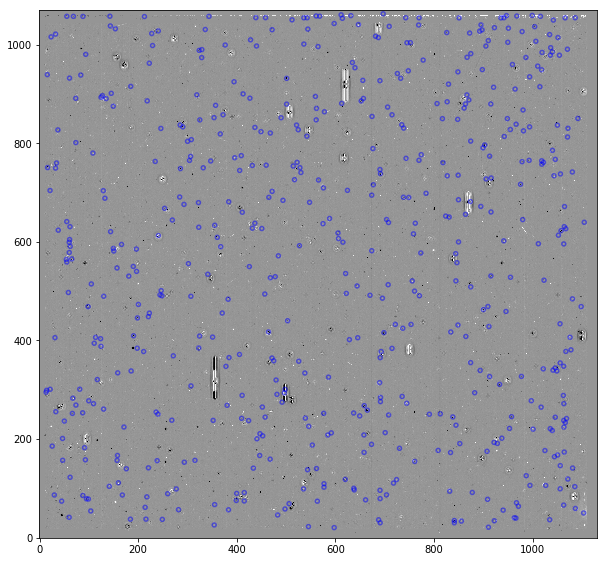

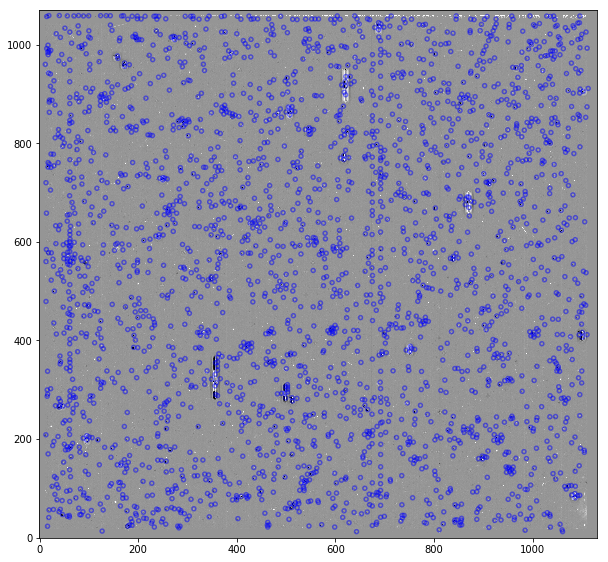

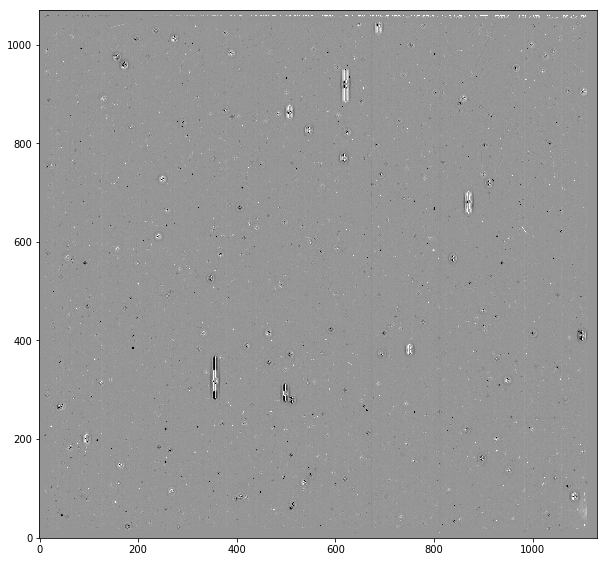

In [25]:
imagename = '/home/mj1e16/difkplr2009115080620_ffi-cal57.fits'
output = daoStarFinder(imagename,assoc)


In [ ]:
os.chdir('/home/mj1e16/sextractor/sextractor-master/config/')
subprocess.call(['sex','/data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits[10]'])
assoc_reg = T.Table.read("/home/mj1e16/sextractor/sextractor-master/config/test.cat", format='ascii.sextractor')

/data/mj1e16/kepler/diffImages/difkplr2009114204835_ffi-cal10.fits


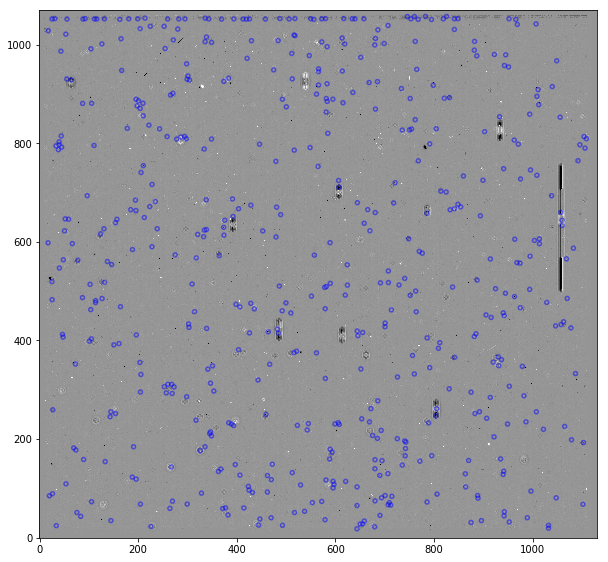

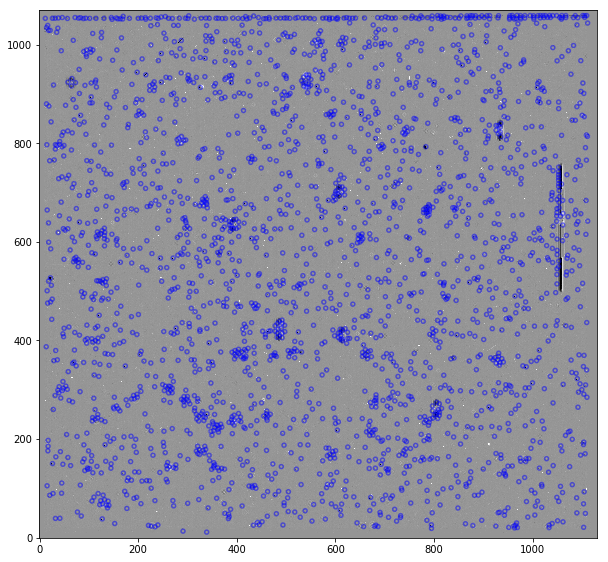

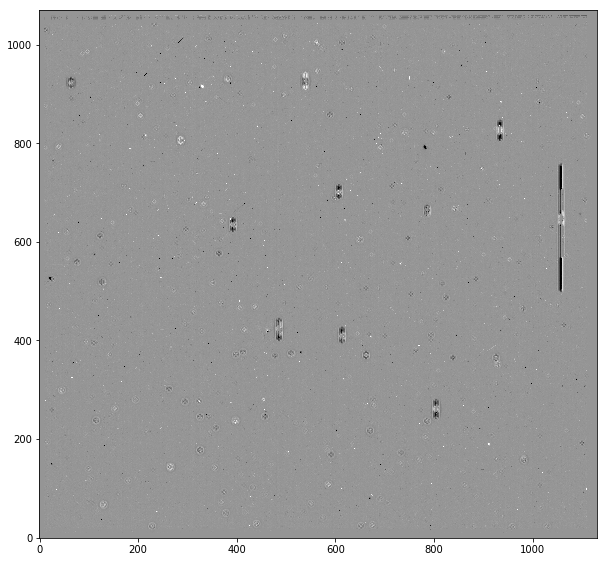

In [39]:

imagename = '/data/mj1e16/kepler/diffImages/difkplr2009114204835_ffi-cal10.fits'
output = daoStarFinder(imagename,assoc)

In [45]:
output[0]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,643.960361715,17.8203968721,0.958224756538,-0.788558086739,-0.0284295967209,49.0,0.0,6.79595947266,1.22274779491,-0.218342220726
2,1032.35689684,19.0376269375,0.486434260564,0.349197896174,-0.580405718322,49.0,0.0,9.01631164551,2.86799711159,-1.14394677403
3,225.746926209,22.3737118035,0.650511929298,-0.386655129067,0.905086926942,49.0,0.0,13.5948028564,4.10137029195,-1.53232245327
4,679.608862098,21.8990326306,0.92615933151,0.920839628272,-0.644297857256,49.0,0.0,16.1401824951,3.00019336589,-1.19287311599
5,33.9236351775,24.2080830922,0.654588089643,-0.170071319334,-0.208835806884,49.0,0.0,3.9912109375,1.09832347121,-0.101825661466
6,1032.36391183,24.8027021005,0.956547642125,0.560798978231,0.138261267274,49.0,0.0,11.2822265625,2.17186814297,-0.84208363779
7,444.280626183,25.2415558884,0.278383895952,0.271977338021,0.0496313658881,49.0,0.0,9.81970214844,4.12930667501,-1.53969284555
8,492.811671043,24.8069008151,0.492122618249,0.68584761819,-0.688398075062,49.0,0.0,5.80381774902,1.3064930947,-0.290267796654
9,655.27029491,27.5770020127,0.276938875285,-0.0307687025593,0.125218095288,49.0,0.0,-0.0732421875,3.07933555333,-1.22114254072


In [46]:
customSimbad = Simbad()
customSimbad.add_votable_fields('ra(d)','dec(d)','otype')
customSimbad.remove_votable_fields('coordinates')

In [64]:
coords = []
dfList = output[0]['id'][-1]

for x in range(dfList):
    xpos = output[0]['xcentroid'][x]
    ypos = output[0]['ycentroid'][x]
    if 20 < ypos < 1040:
        if 12 < xpos < 1110:
            coords.append([xpos,ypos])


In [65]:
coords

[[225.74692620879759, 22.373711803479079],
 [679.6088620984832, 21.899032630630138],
 [33.923635177493303, 24.208083092179436],
 [1032.3639118257959, 24.802702100536255],
 [444.28062618251749, 25.241555888376368],
 [492.81167104281883, 24.806900815120454],
 [655.27029490986399, 27.577002012739275],
 [650.3124504832374, 27.368991906575552],
 [952.75371481878437, 31.634857276015008],
 [875.33184176208624, 30.600003302887089],
 [658.9107574513057, 33.670782101944056],
 [144.71152901049393, 34.39384900836896],
 [896.23176936904122, 34.37411404582906],
 [447.0, 37.638983584838783],
 [579.07376530068359, 36.231030368443903],
 [989.47991733493222, 40.16568293098166],
 [469.7140765362268, 40.162761204164788],
 [83.568760601712597, 43.053168565479346],
 [690.58298403429342, 44.960210070677959],
 [942.42906392332304, 43.999243861928662],
 [382.28443309435693, 45.800970807465745],
 [517.1580608145938, 50.666846882624476],
 [75.62737964018207, 50.888489129961933],
 [537.67607407001981, 53.26313341

In [66]:
coords = load_wcs_from_file(imagename,coords)


[[ 288.46184302   38.79653647]
 [ 288.0952537    39.20915145]
 [ 288.6135927    38.62079085]
 [ 287.80351662   39.52696222]
 [ 288.28224745   38.99340392]
 [ 288.24348012   39.03776107]
 [ 288.10840627   39.18348896]
 [ 288.11268114   39.17912189]
 [ 287.86080705   39.45056434]
 [ 287.92540206   39.38109512]
 [ 288.09831499   39.18294796]
 [ 288.51292865   38.71526844]
 [ 287.90388148   39.39764077]
 [ 288.26556207   38.98807497]
 [ 288.16018773   39.10888679]
 [ 287.82069301   39.47841184]
 [ 288.24423347   39.0071181 ]
 [ 288.55187415   38.65419335]
 [ 288.0593334    39.20455339]
 [ 287.85477278   39.43338673]
 [ 288.30833814   38.92414548]
 [ 288.19353102   39.04358614]
 [ 288.54910873   38.64205653]
 [ 288.17386233   39.06057709]
 [ 287.84453835   39.42844971]
 [ 288.30181577   38.90625535]
 [ 288.38774316   38.80858512]
 [ 288.29562873   38.91050135]
 [ 288.26571712   38.94452388]
 [ 288.07375962   39.14964685]
 [ 288.01709029   39.2110364 ]
 [ 288.02053868   39.20591062]
 [ 288.

In [58]:
imagename

'/data/mj1e16/kepler/diffImages/difkplr2009114204835_ffi-cal10.fits'

In [62]:
r = 1*u.arcminute

for x in range(100): #len(coords)):

    c = SkyCoord(coords[x][0],coords[x][1],frame='icrs',unit='deg')
    result_table = customSimbad.query_region(c,radius=r)

    try:
        result_table.pprint(show_unit=True) #, max_width=200, max_lines=5)
    except:
        print('###### Possible Transient #######',coords[x])

    MAIN_ID         RA_d        DEC_d     OTYPE
                    deg          deg           
--------------- ------------ ------------ -----
TYC 3121-1419-1 288.45515563  38.79941923  Star
    MAIN_ID         RA_d        DEC_d     OTYPE
                    deg          deg           
--------------- ------------ ------------ -----
TYC 3121-1149-1 288.09068899  39.20384894  Star
    KIC 4145011 288.07916700  39.20114900  Star
('###### Possible Transient #######', array([ 288.6135927 ,   38.62079085]))
('###### Possible Transient #######', array([ 287.80351662,   39.52696222]))
        MAIN_ID             RA_d        DEC_d     OTYPE 
                            deg          deg            
----------------------- ------------ ------------ ------
         TYC 3121-669-1 288.27841610  38.98903187 PulsV*
2MASS J19130651+3858547 288.27716236  38.98188685   Star
('###### Possible Transient #######', array([ 288.24348012,   39.03776107]))
   MAIN_ID         RA_d        DEC_d     OTYPE
     

('###### Possible Transient #######', array([ 288.03535841,   39.09786285]))
('###### Possible Transient #######', array([ 288.06455053,   39.0598619 ]))
('###### Possible Transient #######', array([ 288.15369165,   38.95875213]))
('###### Possible Transient #######', array([ 288.37369394,   38.7091461 ]))
('###### Possible Transient #######', array([ 288.37519299,   38.69940266]))
('###### Possible Transient #######', array([ 288.19432898,   38.89532847]))
('###### Possible Transient #######', array([ 288.15022823,   38.94649341]))
('###### Possible Transient #######', array([ 287.96487845,   39.15298551]))
('###### Possible Transient #######', array([ 287.81927834,   39.30808565]))
('###### Possible Transient #######', array([ 287.75800645,   39.37820831]))
('###### Possible Transient #######', array([ 287.947023  ,   39.16563574]))
('###### Possible Transient #######', array([ 288.10260817,   38.98839065]))
('###### Possible Transient #######', array([ 288.2211627 ,   38.85101002]))

In [63]:
r = 1*u.arcminute

for x in range(100,200): #len(coords)):

    c = SkyCoord(coords[x][0],coords[x][1],frame='icrs',unit='deg')
    result_table = customSimbad.query_region(c,radius=r)

    try:
        result_table.pprint(show_unit=True) #, max_width=200, max_lines=5)
    except:
        print('###### Possible Transient #######',coords[x])

('###### Possible Transient #######', array([ 288.18463868,   38.79460789]))
('###### Possible Transient #######', array([ 288.30152312,   38.66296795]))
('###### Possible Transient #######', array([ 287.84275675,   39.15813696]))
('###### Possible Transient #######', array([ 287.54825766,   39.48463455]))
('###### Possible Transient #######', array([ 287.84178738,   39.15459091]))
('###### Possible Transient #######', array([ 287.56167797,   39.45908709]))
('###### Possible Transient #######', array([ 287.84883223,   39.1379677 ]))
('###### Possible Transient #######', array([ 287.88099405,   39.10121755]))
('###### Possible Transient #######', array([ 287.68392506,   39.31328838]))
('###### Possible Transient #######', array([ 288.14833949,   38.79271791]))
('###### Possible Transient #######', array([ 287.88206525,   39.08872314]))
('###### Possible Transient #######', array([ 288.14572059,   38.78622223]))
('###### Possible Transient #######', array([ 288.14038977,   38.78570396]))

In [67]:
r = 1*u.arcminute

for x in range(200,300): #len(coords)):

    c = SkyCoord(coords[x][0],coords[x][1],frame='icrs',unit='deg')
    result_table = customSimbad.query_region(c,radius=r)

    try:
        result_table.pprint(show_unit=True) #, max_width=200, max_lines=5)
    except:
        print('###### Possible Transient #######',coords[x])

        MAIN_ID             RA_d        DEC_d     OTYPE
                            deg          deg           
----------------------- ------------ ------------ -----
        TYC 3121-1173-1 287.66281215  38.93131765  Star
2MASS J19103621+3855291 287.65087829  38.92475220  Star
            KIC 3838294 287.66845712  38.91821863 RotV*
    MAIN_ID          RA_d        DEC_d     OTYPE
                     deg          deg           
---------------- ------------ ------------ -----
       HD 179484 287.78290440  38.78009879    **
      HD 179484A 287.78292100  38.78012500    **
      HD 179484C 287.78370000  38.78131400   PM*
NAME HD 179484BC 287.78366700  38.78131900   SB*
      HD 179484B 287.78345800  38.78130600   PM*
     KIC 3633577 287.79365200  38.77247200  Star
  MAIN_ID       RA_d        DEC_d      OTYPE  
                deg          deg              
----------- ------------ ------------ --------
   KOI-5987 287.91516333  38.64075817 EB*Algol
KIC 3532922 287.89118385  38.639780

('###### Possible Transient #######', array([ 287.90849172,   38.37778302]))
('###### Possible Transient #######', array([ 287.95402768,   38.32184282]))
('###### Possible Transient #######', array([ 287.97656564,   38.29461657]))
('###### Possible Transient #######', array([ 287.14232278,   39.21544911]))
('###### Possible Transient #######', array([ 287.26957683,   39.07657441]))
('###### Possible Transient #######', array([ 287.75438476,   38.53628499]))
('###### Possible Transient #######', array([ 287.19702138,   39.145629  ]))
('###### Possible Transient #######', array([ 287.7113865 ,   38.57548499]))
('###### Possible Transient #######', array([ 287.78193866,   38.49370798]))
('###### Possible Transient #######', array([ 287.55310817,   38.74946364]))
('###### Possible Transient #######', array([ 287.36956756,   38.94444712]))
('###### Possible Transient #######', array([ 287.37037741,   38.93669433]))
('###### Possible Transient #######', array([ 287.83946513,   38.40852641]))

In [68]:
r = 1*u.arcminute

for x in range(300,400): #len(coords)):

    c = SkyCoord(coords[x][0],coords[x][1],frame='icrs',unit='deg')
    result_table = customSimbad.query_region(c,radius=r)

    try:
        result_table.pprint(show_unit=True) #, max_width=200, max_lines=5)
    except:
        print('###### Possible Transient #######',coords[x])

('###### Possible Transient #######', array([ 287.63758273,   38.54734159]))
('###### Possible Transient #######', array([ 287.07097275,   39.16445165]))
('###### Possible Transient #######', array([ 287.39581329,   38.79952088]))
('###### Possible Transient #######', array([ 287.80464323,   38.34279023]))
('###### Possible Transient #######', array([ 287.05884223,   39.15743307]))
('###### Possible Transient #######', array([ 287.79405063,   38.34113511]))
('###### Possible Transient #######', array([ 287.6190712,   38.5402262]))
('###### Possible Transient #######', array([ 287.87307368,   38.2523038 ]))
('###### Possible Transient #######', array([ 287.87766219,   38.24558308]))
('###### Possible Transient #######', array([ 287.74505223,   38.38898435]))
('###### Possible Transient #######', array([ 287.59681578,   38.55050007]))
('###### Possible Transient #######', array([ 287.18476577,   39.00240411]))
('###### Possible Transient #######', array([ 287.5137375 ,   38.63539492]))
(